# Tasca M7 T01

## Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('wineData.txt', sep = ',', header = None)
df.columns=['Types of wine','Alcohol','Malic acid','Ash', 'Alcalinity of ash','Magnesium','Total phenols', 'Flavanoids',
            'Nonflavanoid phenols','Proanthocyanins', 'Color intensity','Hue','OD280/OD315 of diluted wines',
            'Proline']

df.head()


,Types of wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Descripción de las columnas:**

- Types of wine : Clase Categoría del Vino ( Clase - 1 / 2 / 3)

- Alcohol: Cantidad de Alcholol en ese tipo particular de vino

- Malic acid: Cantidad de ácido málico en ese tipo particular de vino

- Ash: Cantidad de Ceniza en ese tipo particular de vino

- Alcalinity of ash: Cantidad de Alcalinidad de la ceniza en ese tipo de vino particular

- Magnesium: Cantidad de Magnesio en ese tipo particular de vino

- Total phenols: Cantidad de fenol en ese tipo particular de vino

- Flavonoides: cantidad de flavonoides en ese tipo particular de vino

- Nonflavanoid phenols: Cantidad de fenoles no flavonoides en ese tipo particular de vino

- Proantocianinas : Cantidad de Proantocianinas en ese tipo de vino en particular

- Color intensity: Cantidad de intensidad de color para ese tipo de vino en particular

- Hue: Cantidad de Matiz para ese tipo de vino en particular

- OD280/OD315 of diluted wines: Cantidad de diluido en ese tipo de vino en particular

- Proline : Cantidad de Prolina en ese tipo particular de vino

[Fuente](https://rpubs.com/Kanasani/724932)

In [3]:
df.describe()

,Types of wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Types of wine                 178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

El Data Frame tiene 178 registros, sin valores nulos.

<Figure size 432x288 with 0 Axes>

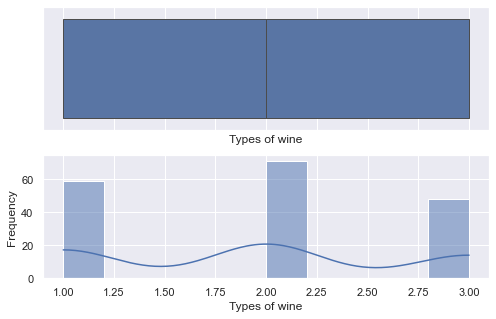

<Figure size 576x360 with 0 Axes>

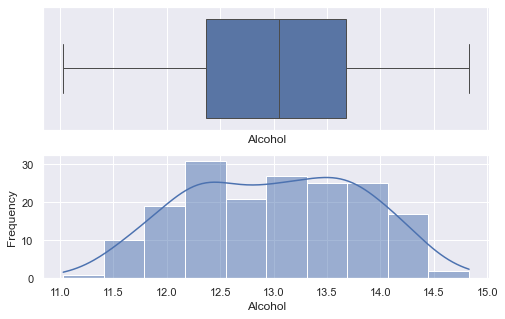

<Figure size 576x360 with 0 Axes>

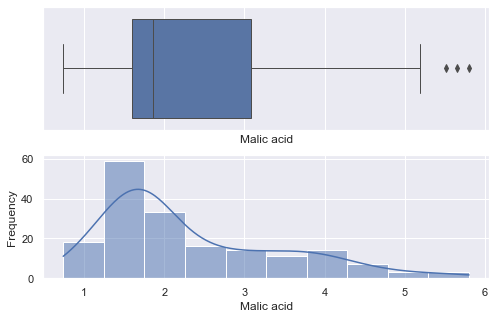

<Figure size 576x360 with 0 Axes>

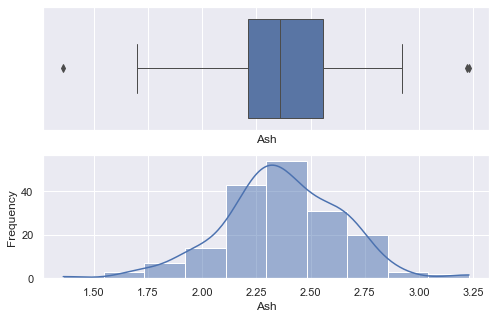

<Figure size 576x360 with 0 Axes>

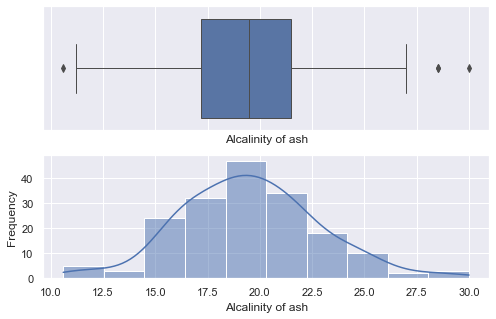

<Figure size 576x360 with 0 Axes>

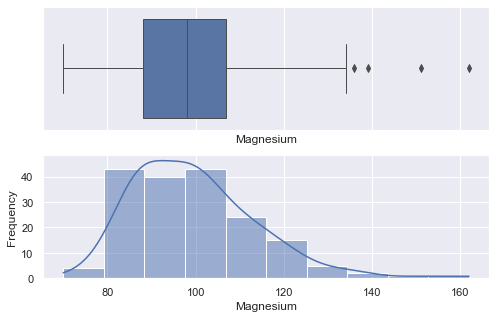

<Figure size 576x360 with 0 Axes>

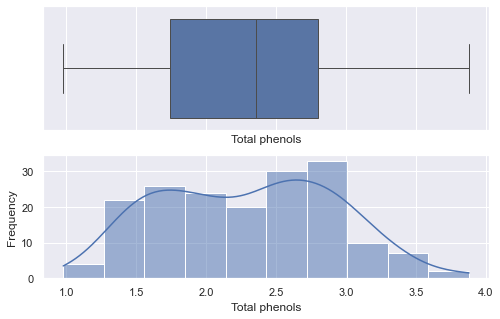

<Figure size 576x360 with 0 Axes>

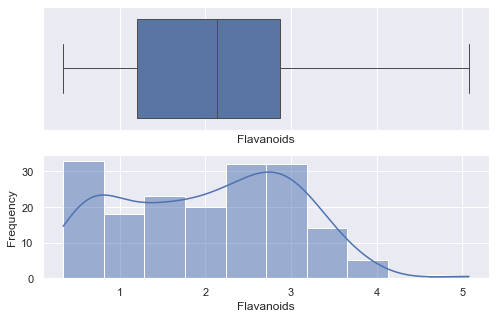

<Figure size 576x360 with 0 Axes>

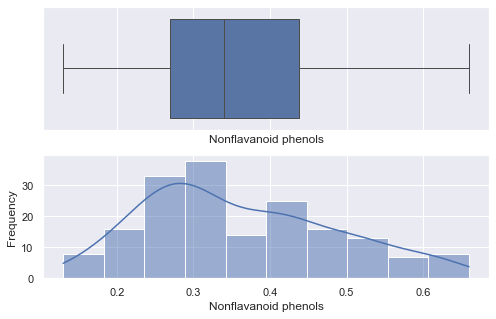

<Figure size 576x360 with 0 Axes>

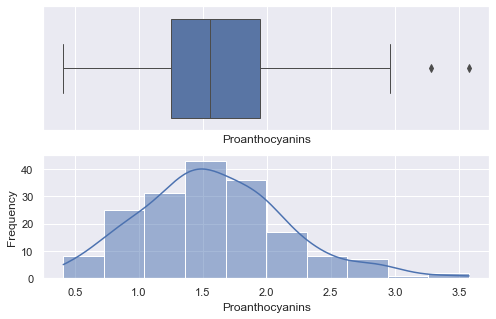

<Figure size 576x360 with 0 Axes>

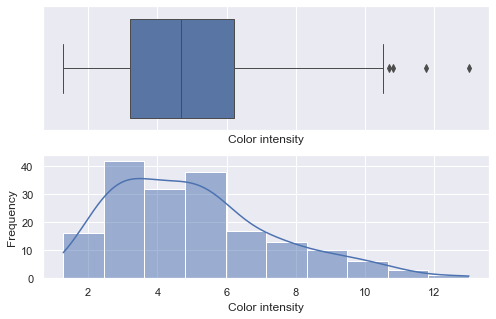

<Figure size 576x360 with 0 Axes>

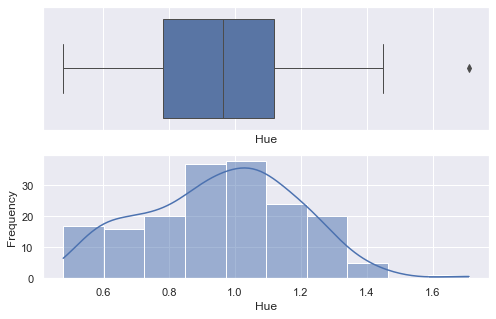

<Figure size 576x360 with 0 Axes>

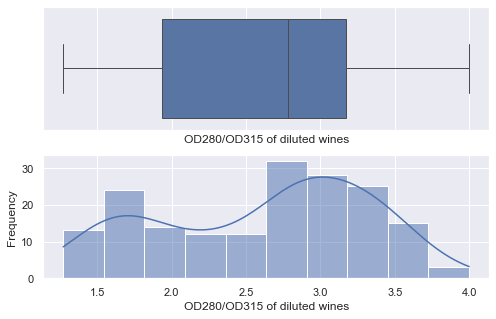

<Figure size 576x360 with 0 Axes>

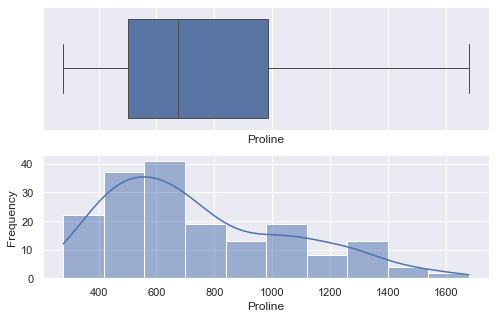

In [5]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

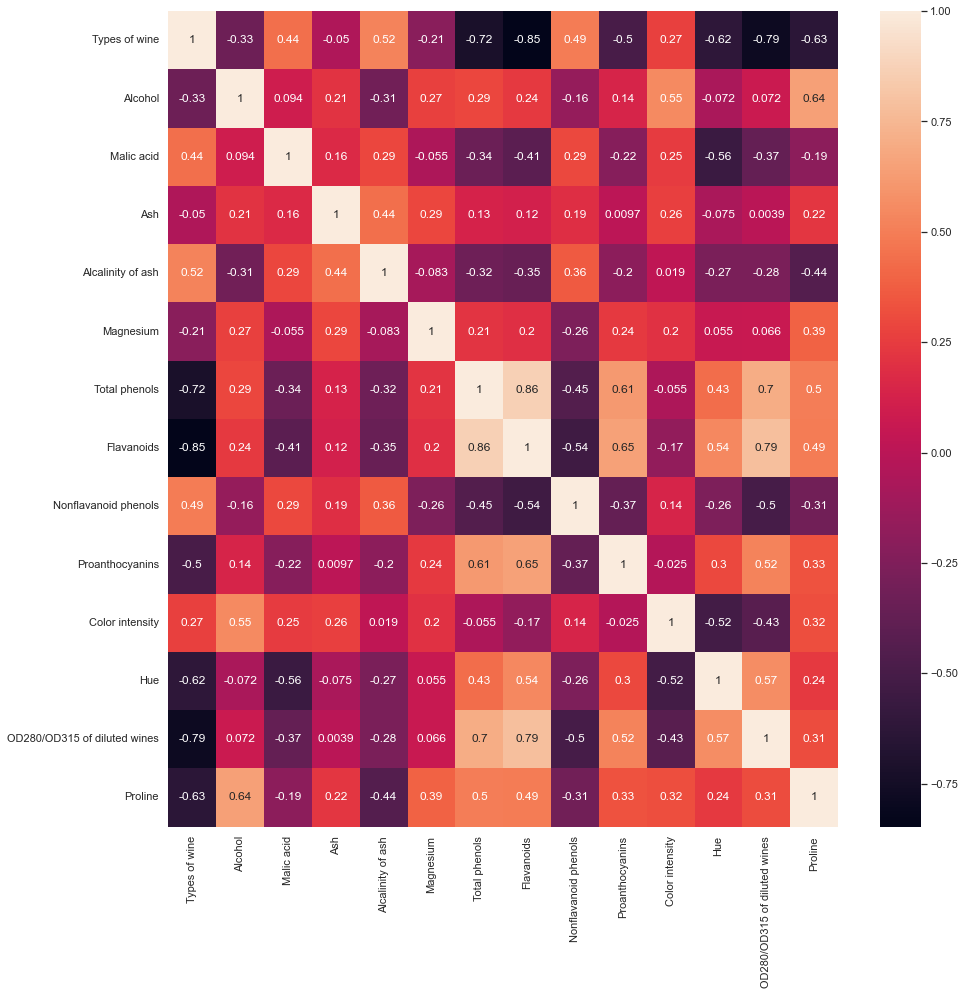

In [6]:
plt.figure(figsize=(15, 15))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [7]:
#Creo un df con las columnas a escalar (con Robust)
dfTran = df.copy()

In [8]:
from scipy import stats


for i in dfTran:
    shapiro_test = stats.shapiro(dfTran[i])
    print('Para la variable ', i, "con un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('Probablemente Gaussiana\n')
    else:
        print("Probablemente no Gaussiana\n")

Para la variable  Types of wine con un p-value de  3.526998097335039e-14
Probablemente no Gaussiana

Para la variable  Alcohol con un p-value de  0.02005171775817871
Probablemente no Gaussiana

Para la variable  Malic acid con un p-value de  2.9459296113643063e-10
Probablemente no Gaussiana

Para la variable  Ash con un p-value de  0.03868526220321655
Probablemente no Gaussiana

Para la variable  Alcalinity of ash con un p-value de  0.26386943459510803
Probablemente Gaussiana

Para la variable  Magnesium con un p-value de  6.345416068143095e-07
Probablemente no Gaussiana

Para la variable  Total phenols con un p-value de  0.004395752213895321
Probablemente no Gaussiana

Para la variable  Flavanoids con un p-value de  1.6790636436780915e-05
Probablemente no Gaussiana

Para la variable  Nonflavanoid phenols con un p-value de  0.00010552661115070805
Probablemente no Gaussiana

Para la variable  Proanthocyanins con un p-value de  0.01445337850600481
Probablemente no Gaussiana

Para la vari

**Pre pocesamiento de datos**
En función de lo observado haré estandarización para la columna con distribución normal: Alcalinity of ash.
De las restantes haré Robust Saclar para las que tienen outliers: Malic acid, ash, Magnesium, Proanthocyanins, Color intensity, Hue tienen outliers y haré con ellas un Robustcaler.
Del resto haré normalización: Alcohol, Total phenols, Flavanoids, Nonflavanoid phenols, OD280/OD315 of diluted wines, Proline. 

In [9]:
from sklearn import preprocessing 

#Estandarización para la columna con distribución normal
ColumnsS = ['Alcalinity of ash']
scalerStand = preprocessing.StandardScaler().fit(df[ColumnsS])
df[ColumnsS] = scalerStand.transform(df[ColumnsS])


#RobustScaler para las columnas con outliers
columnsR = ['Malic acid', 'Ash','Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue']
scalerRobust = preprocessing.RobustScaler().fit(dfTran[columnsR])
dfTran[columnsR] = scalerRobust.transform(dfTran[columnsR])

#Normalización para las columnas de distribución no gaussiana sin outliers
columnsN = ['Alcohol', 'Total phenols', 'Flavanoids', 
            'Nonflavanoid phenols', 'OD280/OD315 of diluted wines', 'Proline']
scalerNorm = preprocessing.MinMaxScaler().fit(dfTran[columnsN])
dfTran[columnsN] = scalerNorm.transform(dfTran[columnsN])

dfTran.head()

,Types of wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,0.842105,-0.104730,0.201439,15.6,1.526316,0.627586,0.573840,0.283019,1.050000,0.318792,0.222222,0.970696,0.561341
1,1,0.571053,-0.057432,-0.633094,11.2,0.105263,0.575862,0.510549,0.245283,-0.392857,-0.104027,0.251852,0.780220,0.550642
2,1,0.560526,0.334459,0.892086,18.6,0.157895,0.627586,0.611814,0.320755,1.792857,0.332215,0.192593,0.695971,0.646933
3,1,0.878947,0.057432,0.402878,16.8,0.789474,0.989655,0.664557,0.207547,0.892857,1.043624,-0.311111,0.798535,0.857347
4,1,0.581579,0.489865,1.467626,21.0,1.052632,0.627586,0.495781,0.490566,0.378571,-0.124161,0.222222,0.608059,0.325963


<Figure size 576x360 with 0 Axes>

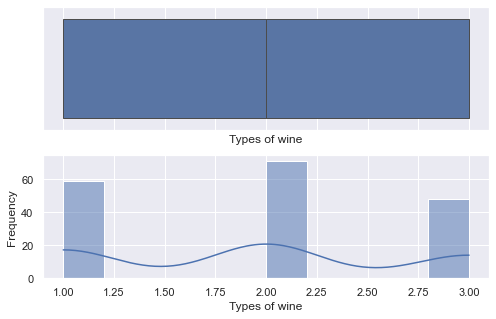

<Figure size 576x360 with 0 Axes>

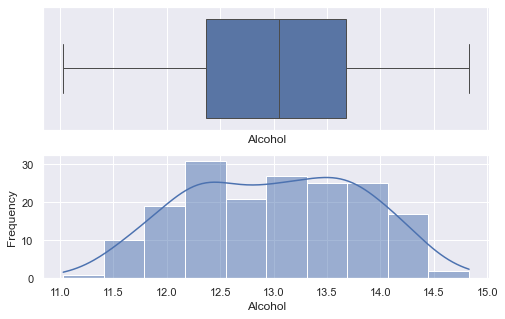

<Figure size 576x360 with 0 Axes>

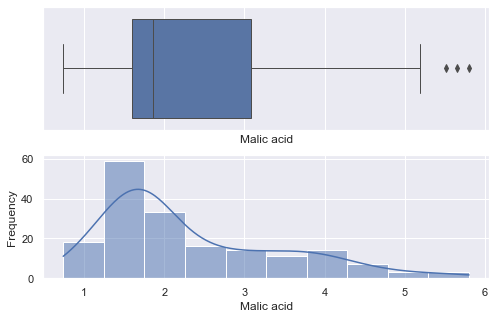

<Figure size 576x360 with 0 Axes>

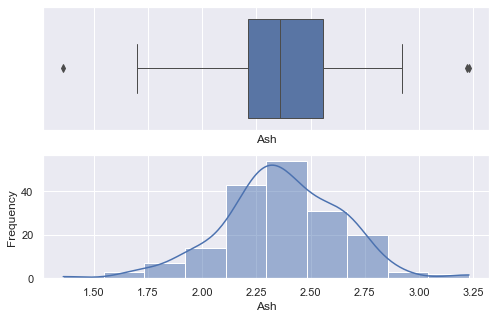

<Figure size 576x360 with 0 Axes>

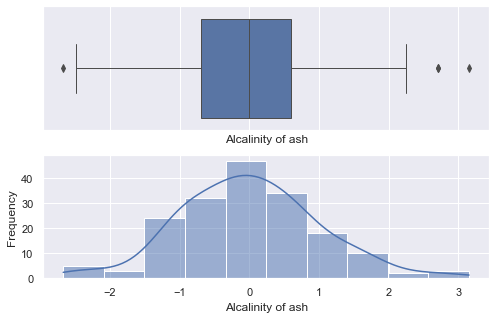

<Figure size 576x360 with 0 Axes>

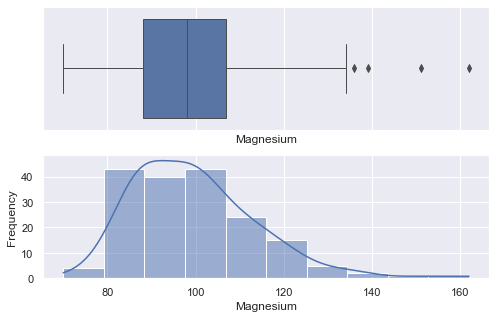

<Figure size 576x360 with 0 Axes>

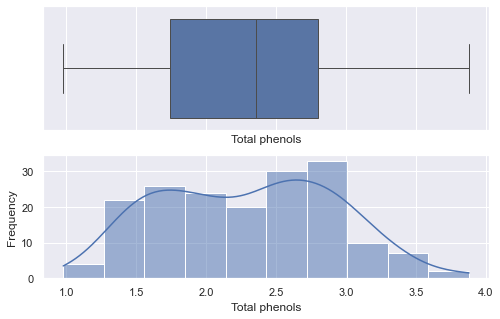

<Figure size 576x360 with 0 Axes>

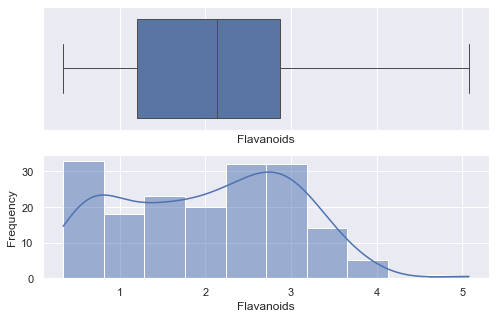

<Figure size 576x360 with 0 Axes>

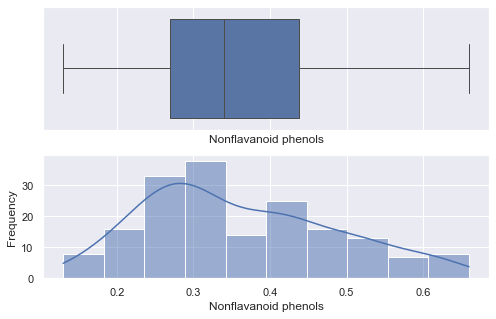

<Figure size 576x360 with 0 Axes>

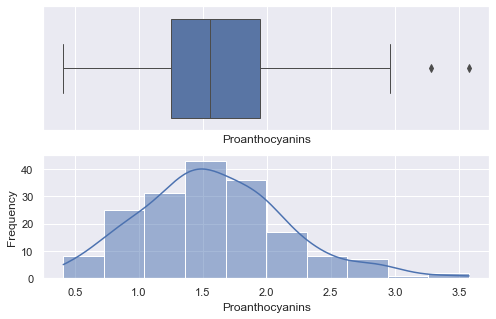

<Figure size 576x360 with 0 Axes>

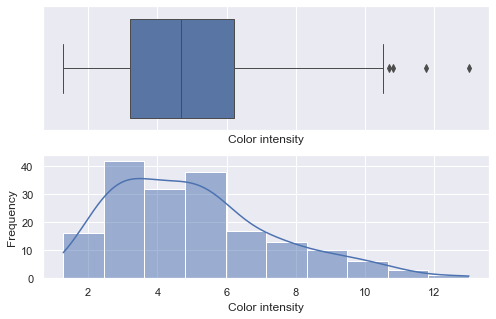

<Figure size 576x360 with 0 Axes>

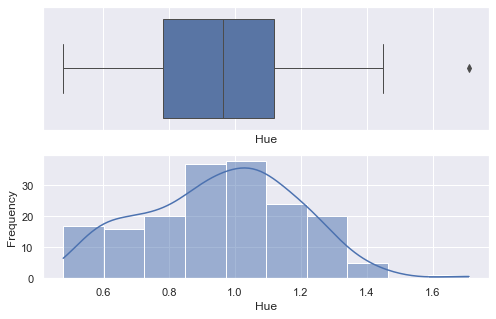

<Figure size 576x360 with 0 Axes>

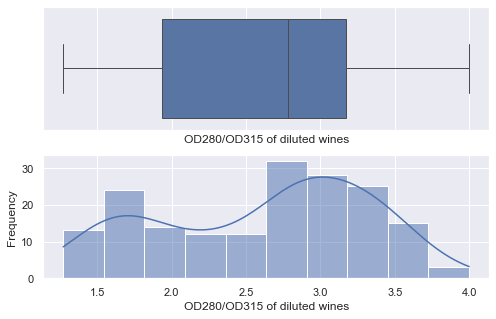

<Figure size 576x360 with 0 Axes>

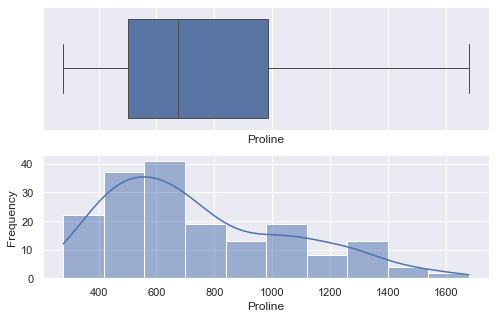

In [10]:
for i in dfTran.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

In [11]:
dfTran.describe()

,Types of wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,1.780000e+02,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02,1.780000e+02,178.000000,178.000000,178.000000
mean,1.938202,0.518584,3.184786e-01,0.018754,19.494944,0.091662,0.453487,0.356386,0.437460,5.128411e-02,1.235201e-01,-0.022372,0.491460,0.334446
std,0.775035,0.213639,7.548284e-01,0.789479,3.339564,0.751710,0.215811,0.210730,0.234818,8.176555e-01,7.779483e-01,0.677249,0.260070,0.224613
min,1.000000,0.000000,-7.601351e-01,-2.877698,10.600000,-1.473684,0.000000,0.000000,0.000000,-1.635714e+00,-1.144295e+00,-1.437037,0.000000,0.000000
25%,1.000000,0.350658,-1.773649e-01,-0.431655,17.200000,-0.526316,0.262931,0.182489,0.264151,-4.357143e-01,-4.932886e-01,-0.540741,0.244505,0.158702
50%,2.000000,0.531579,-7.502679e-17,0.000000,19.500000,0.000000,0.474138,0.378692,0.396226,-1.587272e-16,1.491862e-16,0.000000,0.553114,0.282097
75%,3.000000,0.696711,8.226351e-01,0.568345,21.500000,0.473684,0.627586,0.534810,0.580189,5.642857e-01,5.067114e-01,0.459259,0.695971,0.504280
max,3.000000,1.000000,2.658784e+00,2.503597,30.000000,3.368421,1.000000,1.000000,1.000000,2.892857e+00,2.788591e+00,2.207407,1.000000,1.000000


**División del DF en test/train**

In [12]:
from sklearn.model_selection import train_test_split

X = dfTran.drop(['Types of wine'],axis=1)
y = dfTran[['Types of wine']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.80)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(142, 13) (36, 13) (142, 1) (36, 1)


**Modelos: KNN y SVM**

[Fuente para KNN](https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/), [Fuente para SVM](https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [14]:
from sklearn import svm
SVM = svm.SVC(kernel='linear') 

**Entrenamiento de los modelos**

In [15]:
KNN.fit(X_train, y_train)
SVM.fit(X_train, y_train)

SVC(kernel='linear')

In [16]:
y_pred_KNN = KNN.predict(X_test)
y_pred_SVM = SVM.predict(X_test)

In [17]:
y_pred_KNN

array([1, 3, 2, 1, 3, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 3, 1, 1, 2, 1, 1, 1])

In [18]:
y_pred_SVM

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 3, 1, 1, 2, 1, 1, 1])

## Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

**Accuracy**

In [19]:
acc_KNN = KNN.score(X_test, y_test)
acc_SVM = SVM.score(X_test, y_test)

acc_KNN = "{:.2f}".format(acc_KNN)
acc_SVM = "{:.2f}".format(acc_SVM)


metrics = pd.DataFrame( data = [['KNN', acc_KNN],
                                [ 'SVM', acc_SVM]],
                                 columns = ['Modelo', 'Accuracy'])
metrics.head()

,Modelo,Accuracy
0,KNN,0.86
1,SVM,0.92


**Matriz de consufusión**

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
MC_KNN = confusion_matrix (y_test, y_pred_KNN)
MC_SVM = confusion_matrix (y_test, y_pred_SVM)

[Text(0.5, 1.0, 'Matriz de confusión para KNN')]

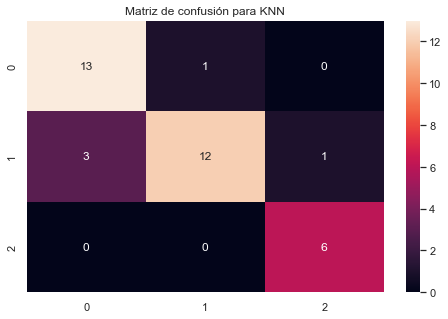

In [22]:
sns.heatmap(MC_KNN, annot=True).set(title='Matriz de confusión para KNN')

[Text(0.5, 1.0, 'Matriz de confusión para SVM')]

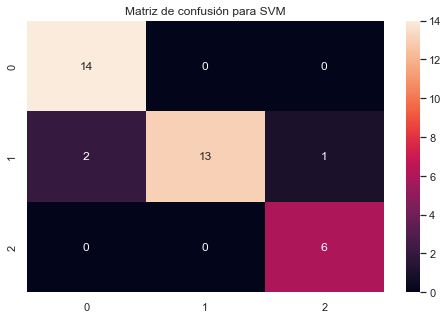

In [23]:
sns.heatmap(MC_SVM, annot=True).set(title='Matriz de confusión para SVM')

**F1 score**

In [24]:
from sklearn.metrics import f1_score
f1_KNN = f1_score(y_test, y_pred_KNN, average='macro')
f1_SVM = f1_score(y_test, y_pred_SVM, average='macro')

f1_KNN = "{:.2f}".format(f1_KNN)
f1_SVM = "{:.2f}".format(f1_SVM)


metrics = pd.DataFrame( data = [['KNN', acc_KNN, f1_KNN],
                                [ 'SVM', acc_SVM, f1_SVM]],
                       columns = ['Modelo', 'Accuracy', 'F1'])
metrics

,Modelo,Accuracy,F1
0,KNN,0.86,0.87
1,SVM,0.92,0.92


## Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

Busco la mejor K (cantidad de vecinos) para el modelo KNN
[Fuente](https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/)

In [25]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

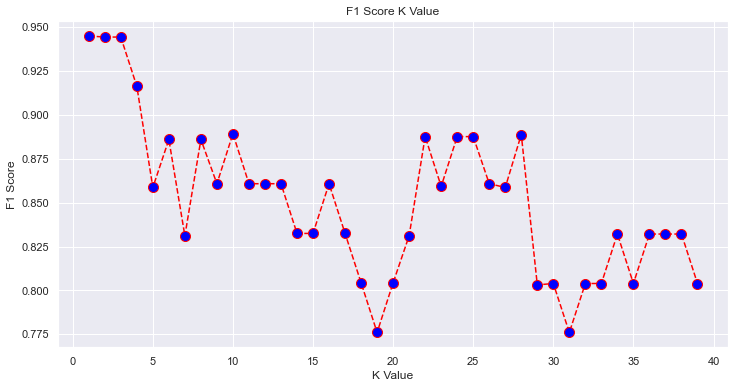

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [27]:
KNN3 = KNeighborsClassifier(n_neighbors=3)
KNN3.fit(X_train, y_train)
y_pred_KNN3 = KNN3.predict(X_test)

acc_KNN3 = KNN3.score(X_test, y_test)

acc_KNN3 = "{:.2f}".format(acc_KNN3)


acc_KNN3


'0.94'

In [28]:
f1_KNN3 = f1_score(y_test, y_pred_KNN3, average='macro')

f1_KNN3 = "{:.2f}".format(f1_KNN3)

f1_KNN3

'0.96'

In [29]:
metrics = pd.DataFrame( data = [['KNN', acc_KNN, f1_KNN],
                                [ 'SVM', acc_SVM, f1_SVM],
                                ['KNN mejorado', acc_KNN3, f1_KNN3]],
                       columns = ['Modelo', 'Accuracy', 'F1'])
metrics

,Modelo,Accuracy,F1
0,KNN,0.86,0.87
1,SVM,0.92,0.92
2,KNN mejorado,0.94,0.96


Busco mejorar los parámetros del modelo SVM

[Fuente](https://www.kaggle.com/code/rajeevnair676/svm-hyperparameter-tuning)

In [30]:
from pprint import pprint

# ver los Parámetros actualmente en uso
print('Parámetros actualmente en uso:\n')
pprint(SVM.get_params())

Parámetros actualmente en uso:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [31]:
from sklearn.model_selection import GridSearchCV
#Hyperparamter tuning using Gridsearch

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
SVM_mejorado = GridSearchCV(SVM,param_grid)

#Fitting the model
SVM_mejorado.fit(X_train,y_train)


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [32]:
y_pred_SVM_mejorado = SVM_mejorado.predict(X_test)

acc_SVM_mejorado = SVM_mejorado.score(X_test, y_test)

acc_SVM_mejorado = "{:.2f}".format(acc_SVM_mejorado)

acc_SVM_mejorado

'0.97'

In [33]:
f1_SVM_mejorado = f1_score(y_test, y_pred_SVM_mejorado, average='macro')

f1_SVM_mejorado = "{:.2f}".format(f1_SVM_mejorado)

f1_SVM_mejorado

'0.96'

In [34]:
metrics = pd.DataFrame( data = [['KNN', acc_KNN, f1_KNN],
                                [ 'SVM', acc_SVM, f1_SVM],
                                ['KNN mejorado', acc_KNN3, f1_KNN3],
                               ['CVM mejorado', acc_SVM_mejorado, f1_SVM_mejorado]],
                       columns = ['Modelo', 'Accuracy', 'F1'])
metrics

,Modelo,Accuracy,F1
0,KNN,0.86,0.87
1,SVM,0.92,0.92
2,KNN mejorado,0.94,0.96
3,CVM mejorado,0.97,0.96


**Matriz de confusión para los modelos mejorados**

In [35]:
MC_KNN3 = confusion_matrix (y_test, y_pred_KNN3)
MC_SVM_mejorado = confusion_matrix (y_test, y_pred_SVM_mejorado)

[Text(0.5, 1.0, 'Matriz de confusión para KNN mejorado')]

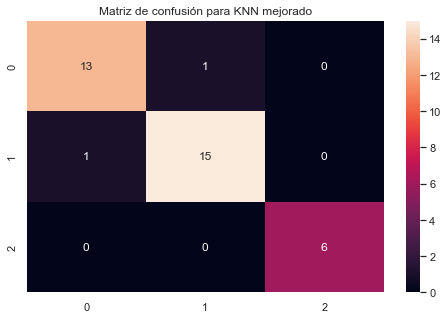

In [36]:
sns.heatmap(MC_KNN3, annot=True).set(title='Matriz de confusión para KNN mejorado')

[Text(0.5, 1.0, 'Matriz de confusión para SVM mejorado')]

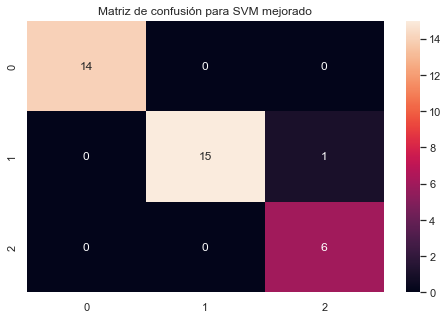

In [37]:
sns.heatmap(MC_SVM_mejorado, annot=True).set(title='Matriz de confusión para SVM mejorado')

## Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

In [38]:
from sklearn.model_selection import cross_val_score

cv_KNN = cross_val_score(KNN, X, y, cv=5, scoring='f1_macro')
print("El F1 de KNN con Cross Validation es: {:.2f}, con un std de: {:.2f}".format(cv_KNN.mean(), 
                                                                                   cv_KNN.std()))

cv_SVM = cross_val_score(SVM, X, y, cv=5, scoring='f1_macro')
print("El F1 de SVM con Cross Validation es: {:.2f}, con un std de: {:.2f}".format(cv_SVM.mean(), 
                                                                                   cv_SVM.std()))

cv_KNN3 = cross_val_score(KNN3, X, y, cv=5, scoring='f1_macro')
print("El F1 de KNN mejorado con Cross Validation es: {:.2f}, con un std de: {:.2f}".format(cv_KNN3.mean(), 
                                                                                            cv_KNN3.std()))

cv_SVM_mejorado = cross_val_score(SVM_mejorado, X, y, cv=5, scoring='f1_macro')
print("El F1 de SVM mejorado con Cross Validation es: {:.2f}, con un std de: {:.2f}".format(cv_SVM_mejorado.mean(), 
                                                                                            cv_SVM_mejorado.std()))

El F1 de KNN con Cross Validation es: 0.85, con un std de: 0.08
El F1 de SVM con Cross Validation es: 0.96, con un std de: 0.03
El F1 de KNN mejorado con Cross Validation es: 0.83, con un std de: 0.04
El F1 de SVM mejorado con Cross Validation es: 0.96, con un std de: 0.03


In [45]:
cv_KNN = "{:.2f}".format(cv_KNN.mean())
cv_SVM = "{:.2f}".format(cv_SVM.mean())
cv_KNN3 = "{:.2f}".format(cv_KNN3.mean())
cv_SVM_mejorado = "{:.2f}".format(cv_SVM_mejorado.mean())

metrics = pd.DataFrame( data = [['KNN', acc_KNN, f1_KNN, cv_KNN],
                                [ 'SVM', acc_SVM, f1_SVM, cv_SVM],
                                ['KNN mejorado', acc_KNN3, f1_KNN3, cv_KNN3],
                               ['CVM mejorado', acc_SVM_mejorado, f1_SVM_mejorado, cv_SVM_mejorado]],
                       columns = ['Modelo', 'Accuracy', 'F1', 'CV'])
metrics

,Modelo,Accuracy,F1,CV
0,KNN,0.86,0.87,0.85
1,SVM,0.92,0.92,0.96
2,KNN mejorado,0.94,0.96,0.83
3,CVM mejorado,0.97,0.96,0.96


## Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

**Ya está hecho en el exercici 1**

**Conclusión**

Tanto el método KNN como el SVM muestran métricas muy buenas, sobre todo tras la mejora de sus parámetros.
El SVM, sin embargo, se muestra un poco superior.